In [1]:
!pip install minisom

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/combined%20Dataset.csv"
df = pd.read_csv(url)



In [3]:
# Display the first few rows of the dataset to understand its structure
print(df.head())




   etpSrcIP   etpSrcP   etpDstP  etpProtocol  totalPacket  label
0  2.536088  0.068600  0.046527     0.055703         1724      0
1  2.437283  0.403030  0.178079     0.231339         1674      0
2  2.631475  0.000000  0.000000     0.000000         1423      0
3  2.930899  0.744501  0.761118     0.507351         1867      0
4  4.449604  0.735550  3.596202     0.999931         2973      0


In [4]:
# Check the data types and basic statistics of the numerical columns
print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   etpSrcIP     718 non-null    float64
 1   etpSrcP      718 non-null    float64
 2   etpDstP      718 non-null    float64
 3   etpProtocol  718 non-null    float64
 4   totalPacket  718 non-null    int64  
 5   label        718 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 33.8 KB
None
         etpSrcIP     etpSrcP     etpDstP  etpProtocol    totalPacket  \
count  718.000000  718.000000  718.000000   718.000000     718.000000   
mean     8.263882    0.924619    0.700327     0.328038  455704.774373   
std      4.671150    0.544394    0.727217     0.187771  391359.488987   
min      2.292760    0.000000    0.000000     0.000000    1223.000000   
25%      2.597673    0.365440    0.172157     0.216382    1863.000000   
50%     12.016391    1.275059    0.767632     0.365121  708984.500

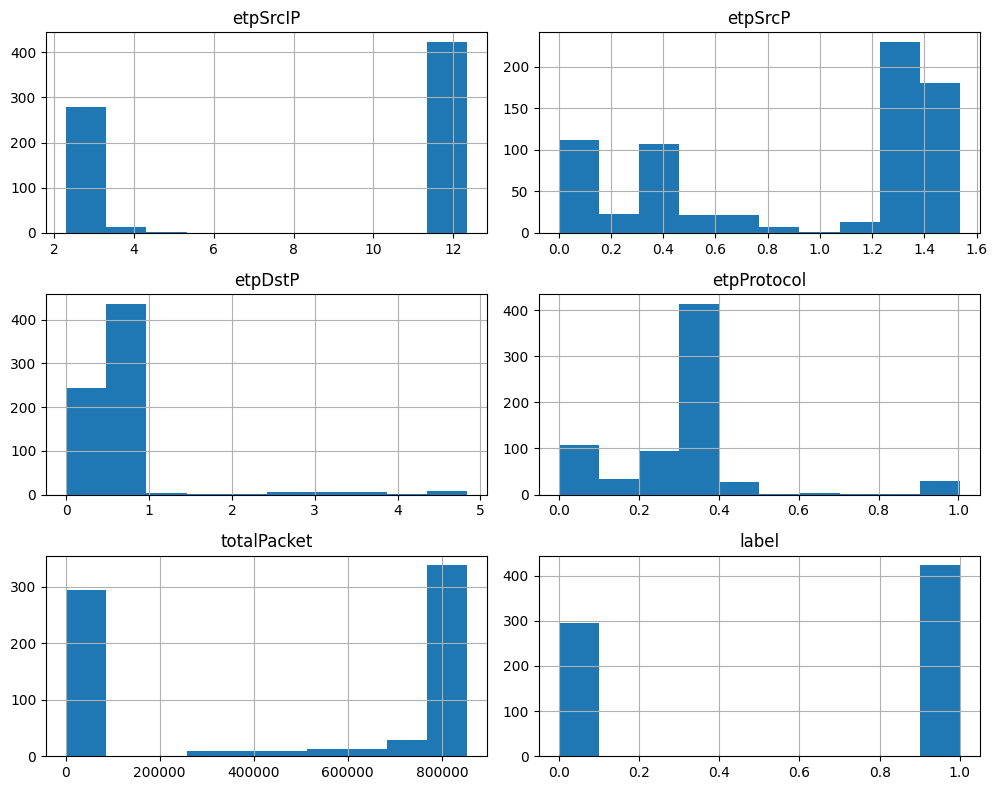

In [4]:
# Data Visualization
# Plotting histograms for numerical features
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()



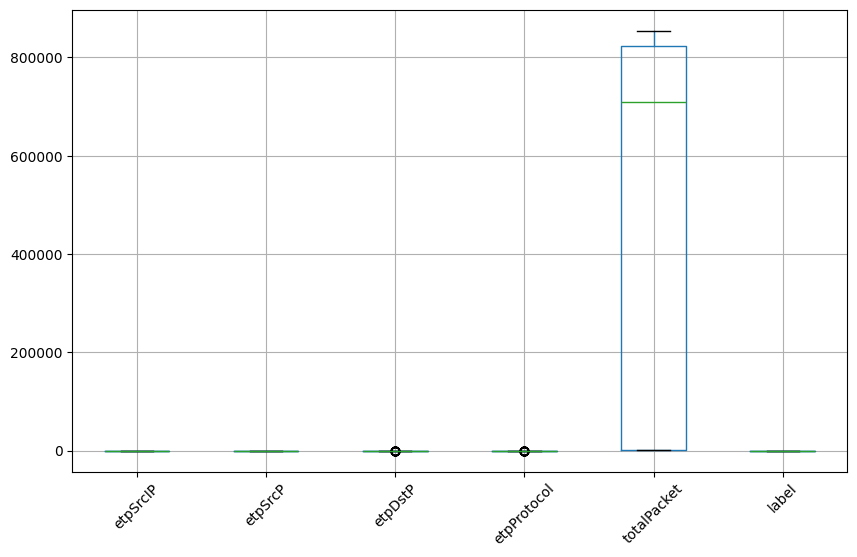

In [5]:
# Boxplot for numerical features
df.boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.show()

# You can also create other types of plots like scatter plots, bar plots, etc. based on your analysis needs

In [6]:
import numpy as np

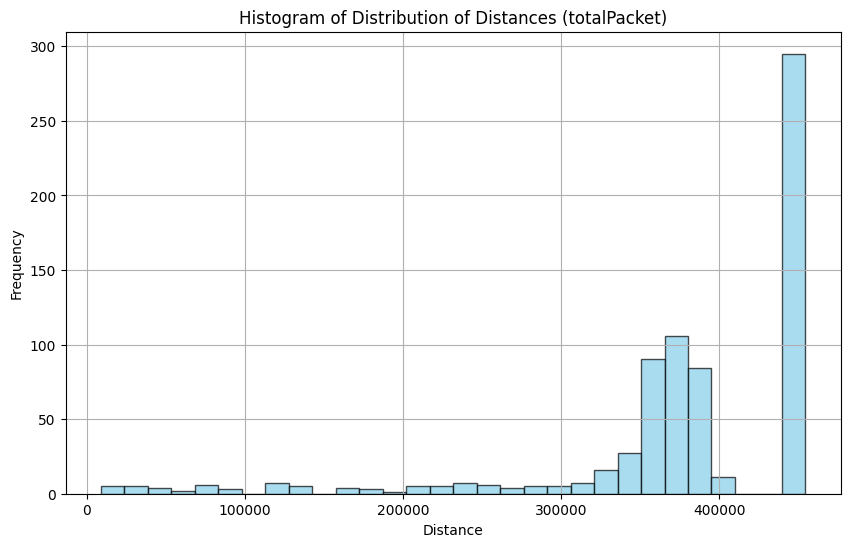

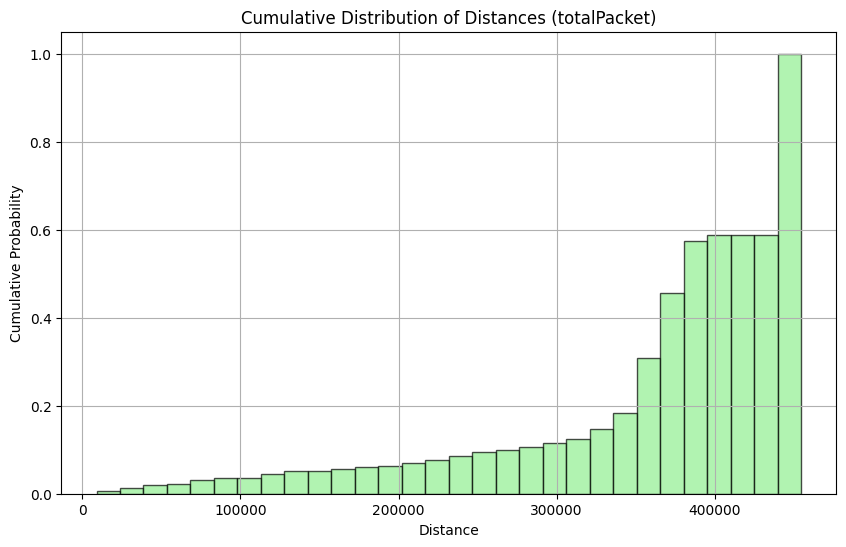

In [7]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Load the dataset
# url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/combined%20Dataset.csv"
# df = pd.read_csv(url)

# Selecting the feature for distance calculation
feature = 'totalPacket'

# Calculate distances
distances = np.abs(df[feature] - df[feature].mean())

# Plotting histogram of the distribution of distances
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Distribution of Distances (' + feature + ')')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting cumulative distribution of distances
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=30, color='lightgreen', edgecolor='black', alpha=0.7, cumulative=True, density=True)
plt.title('Cumulative Distribution of Distances (' + feature + ')')
plt.xlabel('Distance')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()


In [8]:
# import pandas as pd
# import numpy as np

# # Load the dataset
# url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/combined%20Dataset.csv"
# df = pd.read_csv(url)

# # Drop the 'label' column for now
# df.drop('label', axis=1, inplace=True)

# # Calculate and store the mean and standard deviation for each dimension
# mean_std_dict = {}
# for col in df.columns:
#     mean_std_dict[col] = (df[col].mean(), df[col].std())

# # Define the function for normalization using tanh-estimator method
def normalize_with_tanh_estimatortest(data, mean_std_dict):
    normalized_data = pd.DataFrame()
    for col in data.columns:
        mu, sigma = mean_std_dict[col]
        normalized_col = 0.5 * (np.tanh(0.1 * ((data[col] - mu) / sigma)) + 1)
        normalized_data[col] = normalized_col
    return normalized_data

# # Normalize the dataset using tanh-estimator method
# normalized_df = normalize_with_tanh_estimator(df, mean_std_dict)

# # Display the first few rows of the normalized dataset
# print(normalized_df.head())

# # Store mean_std_dict for later use in real-time operation
# # You can save it to a file or store it in memory, depending on your requirements


In [9]:
import pandas as pd
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/combined%20Dataset.csv"
df = pd.read_csv(url)

# Define the columns to exclude from normalization
exclude_cols = ['label']  # Add more columns here if needed

# Calculate and store the mean and standard deviation for each dimension, excluding specified columns
mean_std_dict = {}
for col in df.columns:
    if col not in exclude_cols:
        mean_std_dict[col] = (df[col].mean(), df[col].std())

# Define the function for normalization using tanh-estimator method, excluding specified columns
def normalize_with_tanh_estimator(data, mean_std_dict, exclude_cols):
    normalized_data = pd.DataFrame()
    for col in data.columns:
        if col not in exclude_cols:
            mu, sigma = mean_std_dict[col]
            normalized_col = 0.5 * (np.tanh(0.1 * ((data[col] - mu) / sigma)) + 1)
            normalized_data[col] = normalized_col
        else:
            normalized_data[col] = data[col]  # Keep excluded columns as they are
    return normalized_data

# Normalize the dataset using tanh-estimator method, excluding specified columns
normalized_df = normalize_with_tanh_estimator(df, mean_std_dict, exclude_cols)

# Display the first few rows of the normalized dataset
print(normalized_df.head())

# Store mean_std_dict for later use in real-time operation
# You can save it to a file or store it in memory, depending on your requirements


   etpSrcIP   etpSrcP   etpDstP  etpProtocol  totalPacket  label
0  0.438995  0.422020  0.455169     0.427986     0.442258      0
1  0.437954  0.452241  0.464154     0.474274     0.442252      0
2  0.440001  0.415885  0.451997     0.413527     0.442220      0
3  0.443162  0.483463  0.504180     0.547603     0.442276      0
4  0.459262  0.482642  0.689210     0.671649     0.442416      0


In [10]:
mean_std_dict

{'etpSrcIP': (8.263881658687838, 4.671149926162893),
 'etpSrcP': (0.9246188369475715, 0.5443941383426818),
 'etpDstP': (0.7003273029028211, 0.7272171514281917),
 'etpProtocol': (0.3280379809243417, 0.18777105312169787),
 'totalPacket': (455704.77437325905, 391359.48898741446)}

In [11]:
!pip install minisom

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [14]:
X

array([[2.53608822e+00, 6.86003391e-02, 4.65273996e-02, 5.57031010e-02,
        1.72400000e+03],
       [2.43728318e+00, 4.03030036e-01, 1.78078641e-01, 2.31338872e-01,
        1.67400000e+03],
       [2.63147488e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.42300000e+03],
       ...,
       [1.19578097e+01, 1.29374921e+00, 7.62051451e-01, 3.62338854e-01,
        8.44383000e+05],
       [1.19545126e+01, 1.29075512e+00, 7.62187480e-01, 3.61945476e-01,
        8.38573000e+05],
       [1.19573523e+01, 1.30452119e+00, 7.66948870e-01, 3.64464960e-01,
        8.37313000e+05]])

In [15]:

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [16]:
# Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
import matplotlib.pyplot as plt

In [18]:
!pip install minisom

In [19]:
from minisom import MiniSom
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [20]:
iter =296

 [ 296 / 296 ] 100% - 0:00:00 left 
 quantization error: 428254.5920986627


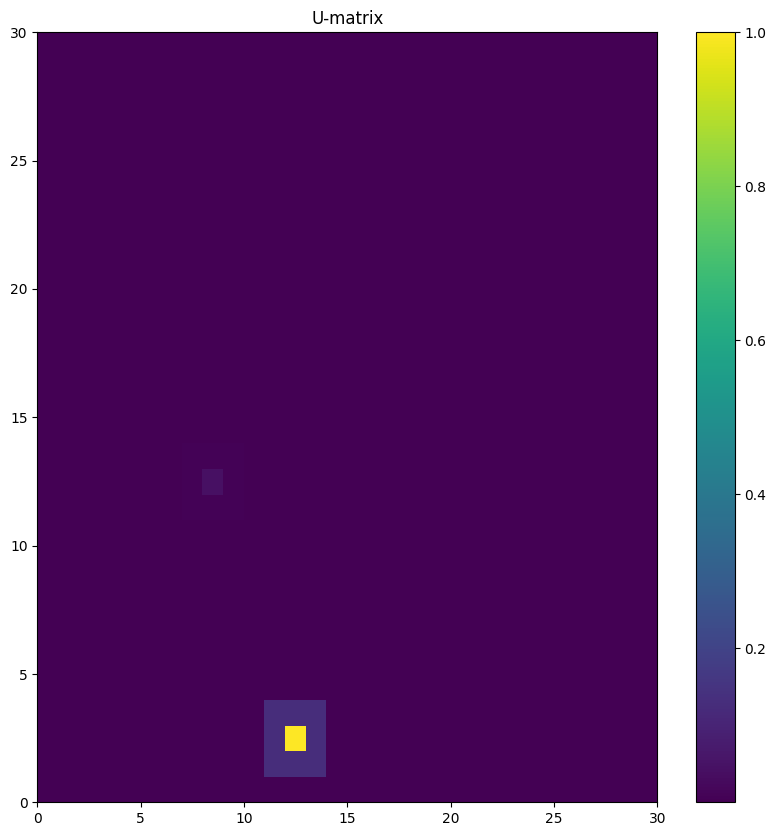

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        80

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



In [21]:
# Initialize and train SOM
som_size = 30  # Example size, adjust based on your dataset
som = MiniSom(som_size, som_size, X.shape[1], sigma=0.2, learning_rate=0.1, random_seed=42 )
som.train_random(X, iter, verbose=True)  # training with 100 iterations

import matplotlib.pyplot as plt

u_matrix = som.distance_map()  # Get the U-matrix

# Plot the U-matrix
plt.figure(figsize=(10, 10))
plt.pcolor(u_matrix, cmap='viridis')  # Use 'viridis' colormap for better visualization
plt.colorbar()
plt.title('U-matrix')
plt.show()

# Mapping each input vector to its respective BMU
winner_coordinates = np.array([som.winner(x) for x in X]).T
# Transforming the SOM's two-dimensional grid to a one-dimensional array
cluster_index = np.ravel_multi_index(winner_coordinates, (som_size, som_size))


# k-NN
knn = KNeighborsClassifier(n_neighbors=3)  # Example k value, adjust based on your dataset
knn.fit(cluster_index.reshape(-1, 1), y)  # Fit using the cluster index as feature


# Example prediction (you can replace X_test with real-time data)
# X_test_normalized = scaler.transform(X_test)  # Assuming X_test is your test set
test_winner_coordinates = np.array([som.winner(x) for x in X_test]).T
test_cluster_index = np.ravel_multi_index(test_winner_coordinates, (som_size, som_size))
y_pred = knn.predict(test_cluster_index.reshape(-1, 1))


# Evaluate performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))  # Assuming y_test is your test set labels

In [22]:
# # Initialize and train SOM
# som_size = 30  # Example size, adjust based on your dataset
# som = MiniSom(som_size, som_size, X.shape[1], sigma=0.2, learning_rate=0.1, random_seed=42 )
# som.train_random(X, 100000000, verbose=True)  # training with 100 iterations

# u_matrix = som.distance_map()  # Get the U-matrix

# # Plot the U-matrix
# plt.figure(figsize=(10, 10))
# plt.pcolor(u_matrix, cmap='viridis')  # Use 'viridis' colormap for better visualization
# plt.colorbar()
# plt.title('U-matrix')
# plt.show()

In [25]:
def calculate_u_matrix(som):
    u_matrix = np.zeros((som.grid_size[0], som.grid_size[1]))

    for i in range(som.grid_size[0]):
        for j in range(som.grid_size[1]):
            neighbors = []
            if i > 0:
                neighbors.append(som.weights[i - 1, j])
            if i < som.grid_size[0] - 1:
                neighbors.append(som.weights[i + 1, j])
            if j > 0:
                neighbors.append(som.weights[i, j - 1])
            if j < som.grid_size[1] - 1:
                neighbors.append(som.weights[i, j + 1])

            u_matrix[i, j] = np.mean([som.euclidean_distance(som.weights[i, j], neighbor) for neighbor in neighbors])

    return u_matrix

In [30]:
import numpy as np

class SOM:
    def __init__(self, input_size, grid_size):
        self.input_size = input_size
        self.grid_size = grid_size
        self.weights = np.random.rand(grid_size[0], grid_size[1], input_size)

    def euclidean_distance(self, tx, ty):
        return np.sqrt(np.sum((tx - ty) ** 2))

    def find_bmu(self, x):
        min_dist = float('inf')
        bmu = None
        for i in range(self.grid_size[0]):
            for j in range(self.grid_size[1]):
                dist = self.euclidean_distance(x, self.weights[i, j])
                if dist < min_dist:
                    min_dist = dist
                    bmu = (i, j)
        return bmu

    def update_weights(self, x, bmu, learning_rate, radius):
        for i in range(self.grid_size[0]):
            for j in range(self.grid_size[1]):
                dist_to_bmu = self.euclidean_distance(np.array(bmu), np.array((i, j)))
                if dist_to_bmu <= radius:
                    self.weights[i, j] += learning_rate * np.exp(-dist_to_bmu / (2 * (radius ** 2))) * (x - self.weights[i, j])

    def train(self, data, epochs, initial_learning_rate, initial_radius):
        for epoch in range(epochs):
            for sample in data:
                bmu = self.find_bmu(sample)
                self.update_weights(sample, bmu, initial_learning_rate * np.exp(-epoch / epochs),
                                    initial_radius * np.exp(-epoch / epochs))
            print(f"Epoch {epoch+1}/{epochs} completed.")
            u_matrix = calculate_u_matrix(som)

# Example usage:
# Initialize SOM
input_size = 5  # Dimension of input vectors
grid_size = (30, 30)  # Size of SOM grid
som = SOM(input_size, grid_size)

# Load the normalized dataset into 'normalized_df'

# Convert the dataframe into numpy array for training
data = normalized_df.values

# Define training parameters
epochs = 200  # Number of training epochs
initial_learning_rate = 0.1  # Initial learning rate
initial_radius = max(grid_size) / 2  # Initial radius for neighborhood function

# Train the SOM
som.train(X_train, epochs, initial_learning_rate, initial_radius)


Epoch 1/200 completed.
Epoch 2/200 completed.
Epoch 3/200 completed.
Epoch 4/200 completed.
Epoch 5/200 completed.
Epoch 6/200 completed.
Epoch 7/200 completed.
Epoch 8/200 completed.
Epoch 9/200 completed.
Epoch 10/200 completed.
Epoch 11/200 completed.
Epoch 12/200 completed.
Epoch 13/200 completed.
Epoch 14/200 completed.
Epoch 15/200 completed.
Epoch 16/200 completed.
Epoch 17/200 completed.
Epoch 18/200 completed.
Epoch 19/200 completed.
Epoch 20/200 completed.
Epoch 21/200 completed.
Epoch 22/200 completed.
Epoch 23/200 completed.
Epoch 24/200 completed.
Epoch 25/200 completed.
Epoch 26/200 completed.
Epoch 27/200 completed.
Epoch 28/200 completed.
Epoch 29/200 completed.
Epoch 30/200 completed.
Epoch 31/200 completed.
Epoch 32/200 completed.
Epoch 33/200 completed.
Epoch 34/200 completed.
Epoch 35/200 completed.
Epoch 36/200 completed.
Epoch 37/200 completed.
Epoch 38/200 completed.
Epoch 39/200 completed.
Epoch 40/200 completed.
Epoch 41/200 completed.
Epoch 42/200 completed.
E

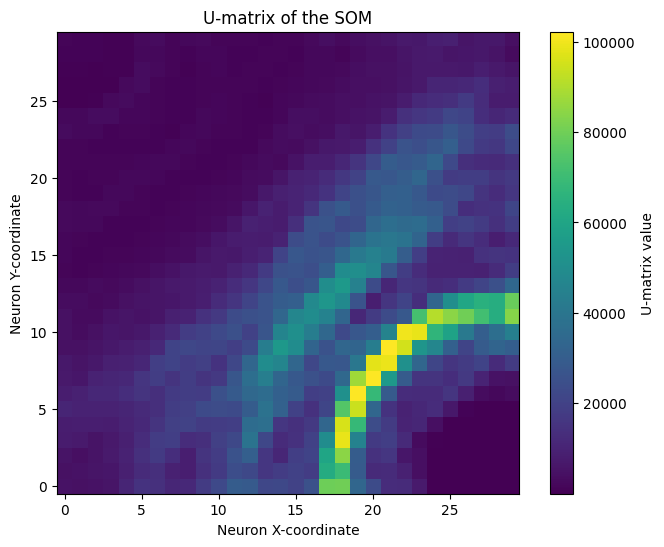

In [31]:
import matplotlib.pyplot as plt



# Calculate U-matrix
u_matrix = calculate_u_matrix(som)

# Plotting the U-matrix
plt.figure(figsize=(8, 6))
plt.imshow(u_matrix, cmap='viridis', origin='lower')
plt.colorbar(label='U-matrix value')
plt.title('U-matrix of the SOM')
plt.xlabel('Neuron X-coordinate')
plt.ylabel('Neuron Y-coordinate')
plt.grid(False)
plt.show()


In [35]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Assuming you have already trained your SOM model and loaded the necessary data

# Mapping each input vector to its respective BMU
def map_to_bmu(som, X):
    winner_coordinates = np.array([som.find_bmu(x) for x in X]).T
    return np.ravel_multi_index(winner_coordinates, (som.grid_size[0], som.grid_size[1]))

# Example usage:
# Assuming 'som' is your trained SOM model and 'X' is your input data

# Map input data to BMUs
cluster_index = map_to_bmu(som, X)

# Initialize k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # Example k value, adjust based on your dataset

# Fit k-NN classifier using cluster indices as features
knn.fit(cluster_index.reshape(-1, 1), y)  # Assuming 'y' is your target labels

# Example prediction (you can replace X_test with real-time data)
# Assuming 'X_test' is your test set and 'y_test' is your test set labels
test_cluster_index = map_to_bmu(som, X_test)
y_pred = knn.predict(test_cluster_index.reshape(-1, 1))

# Evaluate performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        80

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



In [33]:
import numpy as np

# Assuming y_pred and y_test are your NumPy arrays
# Create some sample arrays for demonstration
# y_pred = np.array([1, 2, 3, 4, 5])
# y_test = np.array([1, 3, 2, 4, 5])

# Calculate the difference between y_pred and y_test
difference = y_pred + y_test

print("Difference between y_pred and y_test:", difference)



Difference between y_pred and y_test: [0 2 0 2 2 2 0 2 0 2 2 0 2 0 0 2 0 0 2 2 0 0 2 2 0 0 0 0 0 2 2 0 2 2 0 2 0
 2 0 2 0 2 2 0 0 0 2 2 0 2 0 0 2 2 2 2 0 0 2 2 0 2 2 2 0 2 2 0 2 2 2 2 2 2
 0 0 0 2 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 0 0 2 2 2 2 2 0 2 2 2 2 2 2 2 0
 0 0 2 2 0 0 0 0 2 0 0 0 0 2 2 2 2 2 0 0 2 0 2 0 0 2 0 2 0 0 0 0 0]


In [ ]:
test_cluster_index = map_to_bmu(som, X_test)
y_pred = knn.predict(test_cluster_index.reshape(-1, 1))

# Evaluate performance
print(classification_report(y_test, y_pred))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute U-matrix
def compute_u_matrix(som):
    u_matrix = np.zeros((som.grid_size[0], som.grid_size[1]))
    for i in range(som.grid_size[0]):
        for j in range(som.grid_size[1]):
            neighbors = []
            if i > 0:
                neighbors.append((i - 1, j))
            if i < som.grid_size[0] - 1:
                neighbors.append((i + 1, j))
            if j > 0:
                neighbors.append((i, j - 1))
            if j < som.grid_size[1] - 1:
                neighbors.append((i, j + 1))
            neighbor_distances = []
            for ni, nj in neighbors:
                neighbor_distances.append(np.linalg.norm(som.weights[i, j] - som.weights[ni, nj]))
            u_matrix[i, j] = np.mean(neighbor_distances)
    return u_matrix

# Function to find BMUs for data points
def find_bmus(som, data):
    bmus = []
    for sample in data:
        bmu = som.find_bmu(sample)
        bmus.append(bmu)
    return bmus

# Compute U-matrix before training
u_matrix_before_training = compute_u_matrix(som)

# Find BMUs before training
bmus_before_training = find_bmus(som, data)

# Train the SOM (if not already trained)
# som.train(data, epochs, initial_learning_rate, initial_radius)

# Compute U-matrix after training
u_matrix_after_training = compute_u_matrix(som)

# Find BMUs after training
bmus_after_training = find_bmus(som, data)

# Plot U-matrix before training
plt.figure(figsize=(8, 6))
plt.imshow(u_matrix_before_training, cmap='viridis', origin='lower')
plt.title('U-Matrix Before Training')
plt.colorbar(label='Distance')
plt.show()

# Plot BMUs before training
plt.figure(figsize=(8, 6))
bmus_before_training = np.array(bmus_before_training)
plt.scatter(bmus_before_training[:, 0], bmus_before_training[:, 1], color='red', label='BMUs')
plt.title('BMUs Before Training')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Plot U-matrix after training
plt.figure(figsize=(8, 6))
plt.imshow(u_matrix_after_training, cmap='viridis', origin='lower')
plt.title('U-Matrix After Training')
plt.colorbar(label='Distance')
plt.show()

# Plot BMUs after training
plt.figure(figsize=(8, 6))
bmus_after_training = np.array(bmus_after_training)
plt.scatter(bmus_after_training[:, 0], bmus_after_training[:, 1], color='blue', label='BMUs')
plt.title('BMUs After Training')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute U-matrix
def compute_u_matrix(som):
    u_matrix = np.zeros((som.grid_size[0], som.grid_size[1]))
    for i in range(som.grid_size[0]):
        for j in range(som.grid_size[1]):
            neighbors = []
            if i > 0:
                neighbors.append((i - 1, j))
            if i < som.grid_size[0] - 1:
                neighbors.append((i + 1, j))
            if j > 0:
                neighbors.append((i, j - 1))
            if j < som.grid_size[1] - 1:
                neighbors.append((i, j + 1))
            neighbor_distances = []
            for ni, nj in neighbors:
                neighbor_distances.append(np.linalg.norm(som.weights[i, j] - som.weights[ni, nj]))
            u_matrix[i, j] = np.mean(neighbor_distances)
    return u_matrix

# Function to find BMUs for data points
def find_bmus(som, data):
    bmus = []
    for sample in data:
        bmu = som.find_bmu(sample)
        bmus.append(bmu)
    return bmus

# Example usage:
# Compute U-matrix
u_matrix = compute_u_matrix(som)

# Find BMUs before training
bmus_before_training = find_bmus(som, data)

# Train the SOM (if not already trained)
# som.train(data, epochs, initial_learning_rate, initial_radius)

# Find BMUs after training
bmus_after_training = find_bmus(som, data)

# Plot U-matrix before training
plt.figure(figsize=(8, 6))
plt.imshow(u_matrix, cmap='viridis', origin='lower')
plt.title('U-Matrix Before Training')
plt.colorbar(label='Distance')
plt.show()

# Plot BMUs before training
plt.figure(figsize=(8, 6))
bmus_before_training = np.array(bmus_before_training)
plt.scatter(bmus_before_training[:, 0], bmus_before_training[:, 1], color='red', label='BMUs')
plt.title('BMUs Before Training')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Plot BMUs after training
plt.figure(figsize=(8, 6))
bmus_after_training = np.array(bmus_after_training)
plt.scatter(bmus_after_training[:, 0], bmus_after_training[:, 1], color='blue', label='BMUs')
plt.title('BMUs After Training')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [ ]:
# # Initialize SOM with chosen hyperparameters
# input_size = 5  # Dimension of input vectors
# grid_size = (30, 30)  # Size of SOM grid
# som = SOM(input_size, grid_size)

# # Define training parameters with decreasing learning rate and radius
# epochs = 100  # Number of training epochs
# initial_learning_rate = 0.1  # Initial learning rate
# initial_radius = max(grid_size) / 2  # Initial radius for neighborhood function

# # Train the SOM with decreasing learning rate and radius
# for epoch in range(epochs):
#     learning_rate = initial_learning_rate * np.exp(-epoch / epochs)
#     radius = initial_radius * np.exp(-epoch / epochs)
#     som.train(data, 1, learning_rate, radius)
#     print(f"Epoch {epoch+1}/{epochs} completed.")

# # Plot U-matrix and BMUs as before
# # Compute U-matrix
# u_matrix = compute_u_matrix(som)

# # Find BMUs before training
# bmus_before_training = find_bmus(som, data)

# # Find BMUs after training
# bmus_after_training = find_bmus(som, data)

# # Plot U-matrix before training
# plt.figure(figsize=(8, 6))
# plt.imshow(u_matrix, cmap='viridis', origin='lower')
# plt.title('U-Matrix Before Training')
# plt.colorbar(label='Distance')
# plt.show()

# # Plot BMUs before training
# plt.figure(figsize=(8, 6))
# bmus_before_training = np.array(bmus_before_training)
# plt.scatter(bmus_before_training[:, 0], bmus_before_training[:, 1], color='red', label='BMUs')
# plt.title('BMUs Before Training')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.legend()
# plt.show()

# # Plot BMUs after training
# plt.figure(figsize=(8, 6))
# bmus_after_training = np.array(bmus_after_training)
# plt.scatter(bmus_after_training[:, 0], bmus_after_training[:, 1], color='blue', label='BMUs')
# plt.title('BMUs After Training')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.legend()
# plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to plot SOM neurons in 3D
def plot_som_neurons_3d(som, data, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title)

    # Plot SOM neurons before training
    for i in range(som.grid_size[0]):
        for j in range(som.grid_size[1]):
            ax.scatter(som.weights[i, j, 0], som.weights[i, j, 1], som.weights[i, j, 2], color='blue')

    # Plot SOM neurons after training
    for sample in data:
        bmu = som.find_bmu(sample)
        ax.scatter(som.weights[bmu[0], bmu[1], 0], som.weights[bmu[0], bmu[1], 1], som.weights[bmu[0], bmu[1], 2], color='red')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')

    plt.show()

# Example usage:
# Plot SOM neurons in 3D before and after training
plot_som_neurons_3d(som, data, 'SOM Neurons Before and After Training')
